In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing

In [2]:
from IPython import get_ipython
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

# Common imports
import numpy as np
import os
import seaborn as sns # dataviz
from pandas.plotting import scatter_matrix
# To plot pretty figures
get_ipython().run_line_magic('matplotlib', 'inline')
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Ignore useless warnings (see SciPy issue #5998)
import warnings
warnings.filterwarnings(action="ignore", message="^internal gelsd")

In [3]:
from nltk.tokenize import sent_tokenize
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
from nltk.stem import PorterStemmer
from nltk.stem import PorterStemmer
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords 
from nltk.tokenize import word_tokenize

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\feras\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\feras\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\feras\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [4]:
data= pd.read_csv("./dataset/sqliv2/sqliv2.csv",encoding='utf-16')

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33761 entries, 0 to 33760
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Sentence  33757 non-null  object
 1   Label     33761 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 527.6+ KB


In [6]:
data.head()

,Sentence,Label
0,NaN,1
1,""" or pg_sleep ( __TIME__ ) --",1
2,create user name identified by pass123 tempora...,1
3,%29,1
4,' AND 1 = utl_inaddr.get_host_address ( ( S...,1


# Data Preprocessing

Word Count with CountVectorizer
1. crerate an instance of the CountVectorizer class.
2. call the fit() function in order to learn a vocabulary from one or more documents.
3. call the transform() function on one more document as needed to encode each as a vector.

In [7]:
from sklearn.feature_extraction.text import CountVectorizer
#create the transform
vectorizer = CountVectorizer(min_df=2, max_df=0.7, stop_words=stopwords.words('english')) 
#vectorizer = CountVectorizer()
# tokenize(fit) and build vocab 
vectorizer.fit(data['Sentence'].values.astype('U'))
print(vectorizer.vocabulary_) # to print the vocabulary
#encode document(transform)
vector= vectorizer.transform(data['Sentence'].values.astype('U'))
posts= vector.toarray()

{'nan': 7515, 'pg_sleep': 8021, '__time__': 3372, 'create': 4935, 'user': 9918, 'name': 7512, 'identified': 6405, 'pass123': 7901, 'temp': 9577, 'users': 9922, '29': 862, 'utl_inaddr': 9932, 'get_host_address': 6035, 'select': 8976, 'distinct': 5222, 'table_name': 9497, 'rownum': 8777, 'limit': 6953, 'sys': 9472, 'all_tables': 3576, 'id': 6400, 'union': 9876, 'version': 10003, 'syscolumns': 9481, 'sysobjects': 9484, 'load_file': 6994, 'char': 4512, '47': 1502, '101': 34, '116': 111, '99': 3342, '112': 95, '97': 3276, '115': 107, '119': 127, '100': 23, 'admin': 3448, 'column_name': 4692, 'all_tab_columns': 3575, 'wapiti': 10122, 'ascii': 3785, 'lower': 7042, 'substring': 9395, 'top': 9703, 'xtype': 10258, 'insert': 6517, 'password': 7911, '26': 753, '27': 789, 'null': 7650, 'banner': 3932, 'print': 8247, 'sa': 8812, 'waitfor': 10105, 'delay': 5092, '4039': 1267, '41': 1287, '2b': 899, 'declare': 5069, 'varchar': 9967, '200': 537, 'benchmark': 4042, '10000000': 25, 'md5': 7227, 'sleep': 

max_df is used for removing terms that appear too frequently, also known as "corpus-specific stop words". For example:

    max_df = 0.50 means "ignore terms that appear in more than 50% of the documents".
    max_df = 25 means "ignore terms that appear in more than 25 documents"
    
min_df is used for removing terms that appear too infrequently. For example:

    min_df = 0.01 means "ignore terms that appear in less than 1% of the documents".
    min_df = 5 means "ignore terms that appear in less than 5 documents".


In [8]:
print(vector.shape)
print(type(vector))
print(posts) #print the encoded vectors

(33761, 10321)
<class 'scipy.sparse.csr.csr_matrix'>
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


we have 33761 vectors (samples) and each one has 10321 words (features) (each word will be represented by 0 or 1)

In [9]:
transformed_posts=pd.DataFrame(posts)
df=pd.concat([data,transformed_posts],axis=1)
X=df[df.columns[2:]]
y=df['Label']

In [10]:
df.head()

,Sentence,Label,0,1,2,3,4,5,6,7,...,10311,10312,10313,10314,10315,10316,10317,10318,10319,10320
0,NaN,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,""" or pg_sleep ( __TIME__ ) --",1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,create user name identified by pass123 tempora...,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,%29,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,' AND 1 = utl_inaddr.get_host_address ( ( S...,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [12]:
X.head()

,0,1,2,3,4,5,6,7,8,9,...,10311,10312,10313,10314,10315,10316,10317,10318,10319,10320
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# ML Algorithms:

performance metric functions:

 Accuracy:

In [13]:
def accuracy_function(tp,tn,fp,fn):
    
    accuracy = (tp+tn) / (tp+tn+fp+fn)
    
    return accuracy

Precision:

In [14]:
def precision_function(tp,fp):
    
    precision = tp / (tp+fp)
    
    return precision

recall:

In [15]:
def recall_function(tp,fn):
    
    recall=tp / (tp+fn)
    
    return recall

confusion matrix:

In [5]:

# def performance_metrix(truth,predicted):
    
#     true_positive = 0
#     true_negative = 0
#     false_positive = 0
#     false_negative = 0
    
#     for true,pred in zip(truth,predicted):
#         if true == 1:
#             if pred == true:
#                 true_positive += 1
#             elif pred != true:
#                 false_negative += 1

#         elif true == 0:
#             if pred == true:
#                 true_negative += 1
#             elif pred != true:
#                 false_positive += 1
            
#     accuracy=accuracy_function(true_positive, true_negative, false_positive, false_negative)
#     precision=precision_function(true_positive, false_positive)
#     recall=recall_function(true_positive, false_negative)
    
#     return (accuracy,
#             precision,
#            recall)

Logistic Regression:

In [55]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)


LogisticRegression()

In [56]:
from sklearn.metrics import accuracy_score
y_pred_log_reg=log_reg.predict(X_test)
accuracy_score(y_test, y_pred_log_reg)

0.9582407818747224

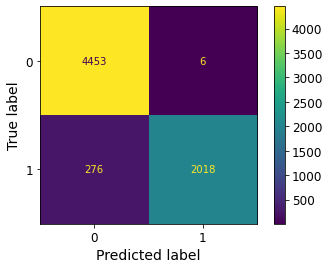

 Accuracy : 0.9582407818747224 
 Precision : 0.9970355731225297 
 Recall : 0.8796861377506539


In [57]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
confusion_matrix(y_test, y_pred_log_reg)
tn, fp, fn, tp = confusion_matrix(y_test, y_pred_log_reg).ravel()
plot_confusion_matrix(log_reg, X_test, y_test)  
plt.show()
accuracy=accuracy_function(tp, tn, fp, fn)
precision=precision_function(tp, fp)
recall=recall_function(tp, fn)
print(" Accuracy : {0} \n Precision : {1} \n Recall : {2}".format(accuracy, precision, recall))

Support Vector Machines:
1) Linear SVM:

In [58]:
from sklearn.svm import LinearSVC
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

In [59]:
svm_clf = Pipeline((
 ("scaler", StandardScaler()),
 ("linear_svc", LinearSVC(C=1, loss="hinge")),
 ))
svm_clf.fit(X_train, y_train)


C:\Users\feras\anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


Pipeline(steps=[('scaler', StandardScaler()),
                ('linear_svc', LinearSVC(C=1, loss='hinge'))])

In [60]:
y_pred_svm=svm_clf.predict(X_test)
accuracy_score(y_test, y_pred_svm)

0.9576484525396121

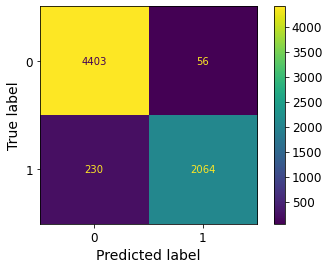

 Accuracy : 0.9576484525396121 
 Precision : 0.9735849056603774 
 Recall : 0.8997384481255449


In [61]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
confusion_matrix(y_test, y_pred_svm)
tn, fp, fn, tp = confusion_matrix(y_test, y_pred_svm).ravel()
plot_confusion_matrix(svm_clf, X_test, y_test)  
plt.show()
accuracy=accuracy_function(tp, tn, fp, fn)
precision=precision_function(tp, fp)
recall=recall_function(tp, fn)
print(" Accuracy : {0} \n Precision : {1} \n Recall : {2}".format(accuracy, precision, recall))

Nonlinear SVM classification:
using polynomial Kernel

In [ ]:
# from sklearn.svm import SVC
# poly_kernel_svm_clf = Pipeline((
#  ("scaler", StandardScaler()),
#  ("svm_clf", SVC(kernel="poly", degree=3, coef0=1, C=5))
#  ))
# poly_kernel_svm_clf.fit(X_train, y_train)


Decision Trees:

In [16]:
from sklearn.tree import DecisionTreeClassifier

tree_clf = DecisionTreeClassifier()
tree_clf.fit(X_train, y_train)

DecisionTreeClassifier()

In [17]:
from sklearn.metrics import accuracy_score
y_pred_tree=tree_clf.predict(X_test)
accuracy_score(y_test, y_pred_tree)

0.9539463941951725

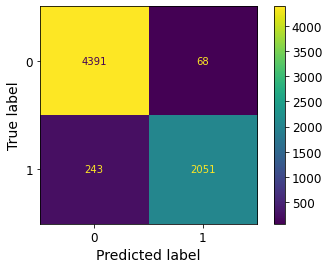

 Accuracy : 0.9539463941951725 
 Precision : 0.9679093912222747 
 Recall : 0.8940714908456844


In [18]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
confusion_matrix(y_test, y_pred_tree)
tn, fp, fn, tp = confusion_matrix(y_test, y_pred_tree).ravel()
plot_confusion_matrix(tree_clf, X_test, y_test)  
plt.show()
accuracy=accuracy_function(tp, tn, fp, fn)
precision=precision_function(tp, fp)
recall=recall_function(tp, fn)
print(" Accuracy : {0} \n Precision : {1} \n Recall : {2}".format(accuracy, precision, recall))

In [ ]:
from sklearn import tree
tree.plot_tree(tree_clf) 

In [ ]:
from sklearn.tree import export_graphviz
dot_data = export_graphviz(
 tree_clf,
 out_file=None,
#  feature_names=iris.feature_names[2:],
#  class_names=iris.target_names,
 rounded=True,
 filled=True,
 special_characters=True
 )

In [ ]:
import graphviz
graph = graphviz.Source(dot_data)
graph